$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

In [1]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time) 

Time taken to compute inverse of A: 0.0034322969999891484


$\large \text{Q1} \text{1. [R] What is a suitable initial choice of B (denoted by B0
)? Justify with proper reasons}$

$\text{Ans: We can take a scalar multiple of identity matrix or a diagonal matrix as initial choice of B}$

$\textbf{Q2:} \text{Implement the modules of BFGS method to solve the problem minx∈Rn f(x) where we have} $

 $f(x) = f(x_1, x_2, . . . , x_n)= \sum_{i=1}^{n-1}[4(x_i^2-x_{i+1})^2+(x_i-1)^2]
 \\ $ 
 $\text{Use backtracking line search with α
0 = 0.9, ρ = 0.5, γ = 0.5 in the implementation of BFGS method. Take the starting point to be }
x^0 = (0, 0, . . . , 0).$

In [2]:
def evalf(x,n):  
  assert type(x) is np.ndarray and len(x) == n 
  fun_val = 0
  for i in range(n-1):   
    fun_val = fun_val + 4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 
  return fun_val  

In [3]:
def evalg(x,n):  
  assert type(x) is np.ndarray and len(x) == n
  grad_list = [16*(x[0]**2 - x[1])*x[0] + 2*(x[0] -1)]
  for i in range(n-2):
     grad_list.append(16*(x[i+1]**2 - x[i+2])*x[i+1] + 2*(x[i+1] -1) - 8*(x[i]**2 - x[i+1]))
  grad_list.append(- 8*(x[n-2]**2 - x[n-1]))   
  a=np.array(grad_list).reshape((n,1))
  return a

In [4]:
def compute_steplength_backtracking(n,x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  while evalf(x+alpha*direction,n)>evalf(x,n)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [5]:
BACKTRACKING_LINE_SEARCH = 1
CONSTANT_STEP_LENGTH=2
EXACT_LINE_SEARCH=3

In [6]:
def BFGS_method(n,start_x,tol,*args):
  assert type(start_x) is np.ndarray  and len(start_x) == n
  assert type(tol) is float and tol>=0 

  x=start_x
  g_x=evalg(x,n)
  B_k=np.identity(n)/4
  alpha_start=args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x)>tol):
    p_k=-np.matmul(B_k,g_x)
    step_length=compute_steplength_backtracking(n,x, g_x, p_k, alpha_start, rho, gamma)

    x_initial=x
    x=x+np.multiply(step_length,p_k)

    s_k=x-x_initial
    y_k=evalg(x,n)-evalg(x_initial,n)
    u_k= 1/np.matmul(y_k.transpose(),s_k)

    B_1=np.eye(n)-u_k*np.matmul(s_k,y_k.transpose())
    B_2=np.eye(n)-u_k*np.matmul(y_k,s_k.transpose())

    B_k=np.matmul(np.matmul(B_1,B_k),B_2)+u_k*np.matmul(s_k,s_k.transpose())
    k=k+1
    g_x=evalg(x,n)
    #if k%1000==0:
      #print('iterations till now:',k)

  return x,evalf(x,n),k


$\text{[R] Take n ∈ {1000, 2500, 5000, 7500, 10000}, find minimizer of the objective function in each case and compute
the time taken by the BFGS} \\ \text{ method with backtracking line search. Tabulate the time taken by BFGS method
for each n.}$

In [24]:
n_list=[1000,2500,5000,7500,10000]

In [ ]:
n_list=[1000,2500,5000,7500,10000]
alpha_start=0.9
rho=0.5
gamma=0.5
iteration_list=[]
time_taken_list=[]
for n in n_list:
  start_time=timer()
  x_start=np.array([0 for i in range(n)]).reshape((n,1))
  minimizer,minimum_val,iter=BFGS_method(n,x_start,1e-3,alpha_start,rho,gamma)
  end_time=timer()
  iteration_list.append(iter)
  time_taken_list.append(end_time-start_time)

  print('when n is :',n)
  print('minimim_value of function is:',minimum_val)
  print('number of iterations taken:',iter)
  print('time taken to solve:',end_time-start_time)
  print('minimizer is :',minimizer)
  
  print('\n********************************************************')


when n is : 1000
minimim_value of function is: [9.98794362e-09]
number of iterations taken: 57
time taken to solve: 21.698501163999936
minimizer is : [[0.99999949]
 [0.99999215]
 [0.99999996]
 [0.99999852]
 [0.99999758]
 [0.99999843]
 [0.99999979]
 [1.00000015]
 [0.99999979]
 [1.00000045]
 [1.00000143]
 [1.00000061]
 [0.99999975]
 [0.99999985]
 [0.99999959]
 [0.99999924]
 [0.99999903]
 [0.99999936]
 [0.99999979]
 [0.99999948]
 [0.9999991 ]
 [0.99999926]
 [0.9999993 ]
 [0.99999922]
 [0.99999937]
 [1.00000004]
 [1.0000008 ]
 [1.00000129]
 [1.0000013 ]
 [1.00000077]
 [0.99999971]
 [0.99999909]
 [0.99999978]
 [1.00000118]
 [1.00000143]
 [0.99999972]
 [0.99999761]
 [0.99999748]
 [1.00000008]
 [1.00000302]
 [1.00000319]
 [0.99999987]
 [0.99999713]
 [0.99999736]
 [1.00000158]
 [1.00000248]
 [1.00000098]
 [0.99999631]
 [1.00000143]
 [1.00000097]
 [0.99999915]
 [1.00000033]
 [1.00000002]
 [1.00000005]
 [1.00000005]
 [1.00000005]
 [1.00000005]
 [1.00000005]
 [1.00000005]
 [1.00000005]
 [1.000000

$\text{ while running the code, for n=7500 it took approx one hour and for n=10000 it was taking so long time and it was disconnected automatically so I wrote the results till n=7500}$

In [25]:

time_taken_bfgs=[21.698501163999936,182.24241892400005,1175.6270615609997,3596.3528745410003]

$\text{Use Newton’s method to solve the problem minx∈Rn f(x) . In Newton’s method implementation, use backtracking line search with} \\  α_
0 = 0.9, ρ = 0.5, γ = 0.5. \\ \text{ Take the starting point to be x
0 = (0, 0, . . . , 0) in the
implementation of Newton’s Method.}
$

In [7]:
def evalh(n, x):
  assert type(x) is np.ndarray and len(x) == n
  h = np.zeros((n,n)) 
  h[0][0] = 48*(x[0])**2 - 16*x[1] + 2
  h[0][1] = -16*x[0]
  for i in range(n-2): 
    h[i+1][i+1] = 8 + 16*(x[i+1]**2 - x[i+2]) + 32*x[i+1]**2 +2
    h[i+1][i+2] = -16*x[i+1]
    h[i+1][i] = h[i][i+1]  
  h[n-1][n-2] = h[n-2][n-1]
  h[n-1][n-1] = 8

  return h

In [21]:
def newton_method(n,start_x,tol,*args):

  x=start_x
  gradf=evalg(x,n)
  hess=evalh(n,x)

  alpha_start=args[0]
  rho = args[1]
  gamma = args[2]
  p_k=-np.matmul(np.linalg.inv(hess),gradf)
  k=0
  while np.linalg.norm(gradf)>tol:
    p_k=-np.matmul(np.linalg.inv(hess),gradf)
    step_length=compute_steplength_backtracking(n,x, gradf, p_k, alpha_start, rho, gamma)
    x=x+step_length*p_k
    k=k+1
    gradf=evalg(x,n)
    hess=evalh(n,x)
    if k%10==0:
      print('norm  after ',k,'iterations is:',np.linalg.norm(gradf), 'and function value is:',evalf(x,n))
  return x, evalf(x,n),k    



$\large \textbf{Q5:} \\ \text{[R] Take n ∈ {1000, 2500, 5000, 7500, 10000}, find minimizer of the objective function in each case and compute
the time taken by } \\ \text{ the Newton’s method with backtracking line search. Tabulate the time taken by Newton’s
method for each n.}$

In [22]:
n_list=[1000,2500,5000,7500,10000]
alpha_start=0.9
rho=0.5
gamma=0.5
iteration_list_newton=[]
time_taken_list_newton=[]
print('Using Newtons method \n ***********************************')
for n in n_list:
  
  start_time=timer()
  x_start=np.array([0 for i in range(n)]).reshape((n,1))
  minimizer,minimum_val,iter=newton_method(n,x_start,1e-3,alpha_start,rho,gamma)
  end_time=timer()
  iteration_list_newton.append(iter)
  time_taken_list_newton.append(end_time-start_time)

  print('when n is :',n)
  print('minimim_value of function is:',minimum_val)
  print('number of iterations taken:',iter)
  print('time taken to solve:',end_time-start_time)
  print('minimizer is :',minimizer)
  
  print('\n********************************************************')

Using Newtons method 
 ***********************************
norm  after  10 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  20 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  30 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  40 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  50 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  60 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  70 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  80 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  90 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  100 iterations is: 102.37090973147649 and function value is: [578.17672422]
norm  after  110 iterations is: 102.37090973147649 and funct

KeyboardInterrupt: ignored

$\textbf{As we can see that after each iteration our norm and function value remains same which conclude that after each } \\ \textbf{ iteration we don't get any implement in our result towards optimal condition. So newton's method is not able to solve} \\ \textbf{ the problem but bfgs is able to solve the problem. So I stopped the runtime.  }$

$\large \textbf{Q5:} \\ \text{[R] Compare the time taken by BFGS method with backtracking line search against the time taken by Newton’s
method with backtracking line search } \\ \text{ for each value of n. Plot the time taken by both methods vs n using
different colors. Comment on your observations.}$

$\text{As we saw that newton method is not able to solve the problem so we create a plot based on the values of n and time taken to solve bfgs method.}$

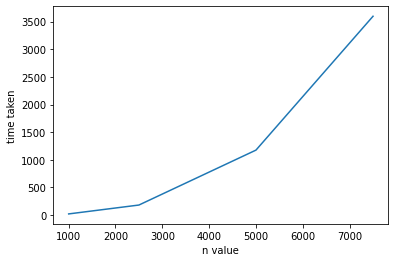

In [27]:
import matplotlib.pyplot as plt
plt.plot(n_list[:-1],time_taken_bfgs)
plt.xlabel('n value')
plt.ylabel('time taken')
plt.show()

$\large \textbf{Observations:} \\ \text{As we can see that as soon as value of n increases , time taken to solve the problem also increases.}$